# **Credit Card Customers Churn Prediction💡**

# **Introduction 💰 -**

*   The bank's manager is concerned about customers leaving their credit card
services. The goal of this analysis is to create a model that predicts whether a customer is likely to leave or not. This prediction will help the bank proactively engage with at-risk customers, provide better services, and ultimately reduce customer churn.

# **Insights into the data -**


*   The dataset contains information on 10,127 bank customers.
*  Categorical features include customer attrition status, gender, education level, marital status, income category, and card category.
* Numerical features include customer age, number of dependents, months as a customer, total product count, months of inactivity, contact count, credit limit, revolving balance, average open-to-buy credit, transaction amount changes, total transaction amount, total transaction count, transaction count changes, and average credit card utilization ratio.
* Attrition_Flag indicates customer churn status, where "Attrited Customer" represents churned customers, and "Existing Customer" represents those who haven't churned.
* The dataset is suitable for analyzing customer behavior and predicting churn.




# **Import all libraries & dependencies**

In [ ]:
#Installing Dependencies
!pip install eli5
!pip install datasist

In [140]:
# EDA Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib as pyplot
import statsmodels.api as sm

# Data Preprocessing Libraries
from datasist.structdata import detect_outliers
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2

# Machine Learing (classification models) Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [7]:
# Data Loading
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSMT/BankChurners.csv')

In [8]:
# Checking number of rows and columns of data
df.shape

(10127, 23)

- There are 23 columns in the dataset and a total of 10,127 rows.

In [17]:
data_types = df.dtypes
categorical_columns = data_types[data_types == 'object'].index
numerical_columns = data_types[data_types != 'object'].index

# Count the number of categorical and numerical columns
num_categorical_columns = len(categorical_columns)
num_numerical_columns = len(numerical_columns)

print(f'Number of Categorical Columns: {num_categorical_columns}')
print(f'Number of Numerical Columns: {num_numerical_columns}')

Number of Categorical Columns: 6
Number of Numerical Columns: 17


In [12]:
# Descriptive analysis for categorical data
df.describe(include='O')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [10]:
# Descriptive analysis for numerical data
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [11]:
# Getting a glimpse into the dataset
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [13]:
# Checking names of columns
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [14]:
# Checking for duplicated values
df.duplicated().sum()

0

- Data doesn't contain any duplicated values

In [15]:
# Checking count for the number of unique values in each column of the data
df.nunique()

CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                            4
Income_Category     

### **Q1. What are the data types? (Only numeric and categorical)**
Ans 1 -
***Datatypes -***
   - There are 7 columns with a `float64` datatype.
   - There are 10 columns with an `int64` datatype.
   - There are 6 columns with an `object` datatype.

  ***Number of categorical and numerical data?***
   - Numerical Data: There are 17 numerical columns (7 `float64` and 10 `int64`).
   - Categorical Data: There are 6 categorical columns with an `object` datatype.



In [9]:
# Further insights into the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

### Q2 - Are there any missing values?
Ans 2 - No, there are no missing values in this dataset. You have a "Non-Null Count" of 10127 for all columns.


In [16]:
#Checking if their are any missing values
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

**Features Extraction -**
- CLIENTNUM : Unique client identifier.
- Attrition_Flag : Indicates whether the customer's account is active or has churned.
- Customer_Age : Age of the customer.
- Gender : Gender of the customer.
- Dependent_count : Number of dependents of the customer.
- Education_Level : Educational level of the customer.
- Marital_Status : Marital status of the customer.
- Income_Category : Income category of the customer.
- Card_Category : Category of the credit card held by the customer.
- Months_on_book : Number of months the customer has been a bank client.
- Total_Relationship_Count : Total number of bank products held by the customer.
- Months_Inactive_12_mon : Number of months with inactivity in the last 12 months.
- Contacts_Count_12_mon : Number of contacts with the bank in the last 12 months.
- Credit_Limit : Credit limit on the credit card.
- Total_Revolving_Bal : Total revolving balance on the credit card.
- Avg_Open_To_Buy : Average open to buy credit line on the credit card.
- Total_Amt_Chng_Q4_Q1 : Change in transaction amount over the last four quarters.
- Total_Trans_Amt : Total transaction amount in the last 12 months.
- Total_Trans_Ct : Total transaction count in the last 12 months.
- Total_Ct_Chng_Q4_Q1 : Change in transaction count over the last four quarters.
- Avg_Utilization_Ratio : Average utilization ratio of the credit card.

In [18]:
# Dropping columns with unusual names
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

#Dropping CLIENTNUM column as it's a unique identifier and not useful for predictions.
df = df.drop( 'CLIENTNUM', axis=1)

In [21]:
#Shape of data after non-useful columns dropped for the dataset
df.shape

(10127, 20)

In [23]:
# Gaining insights into new dataframe created
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### **Q3. Likely distributions of the numeric variables:**
- Density curves Plotting density curves for numeric variables. A density plot is a smoothed, continuous version of a histogram estimated from the data.

1. x-axis: Variable
2. y-axis: Density (frequency with respect to number of instances)

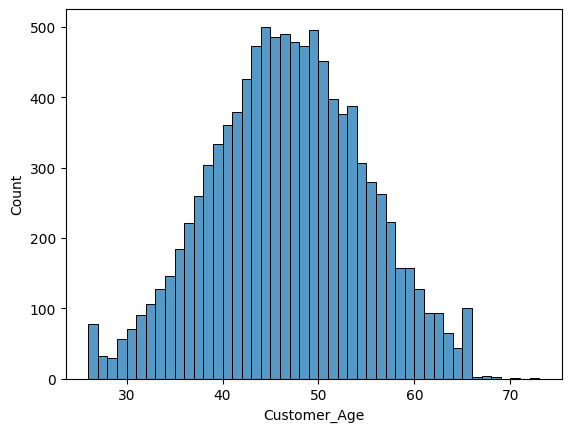

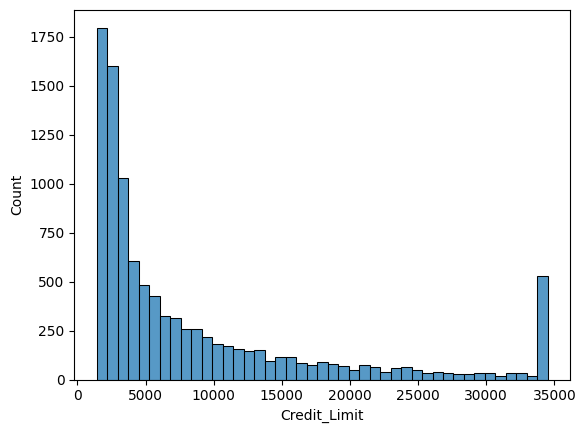

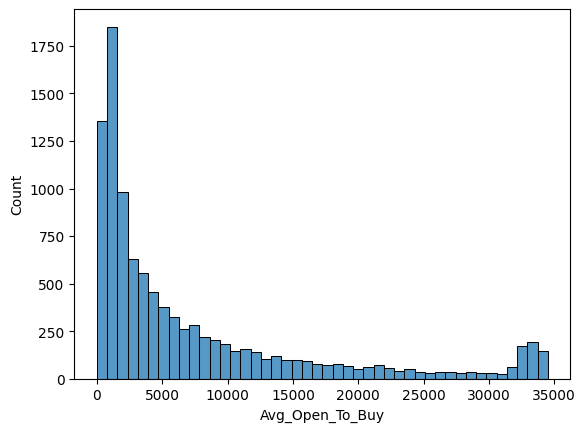

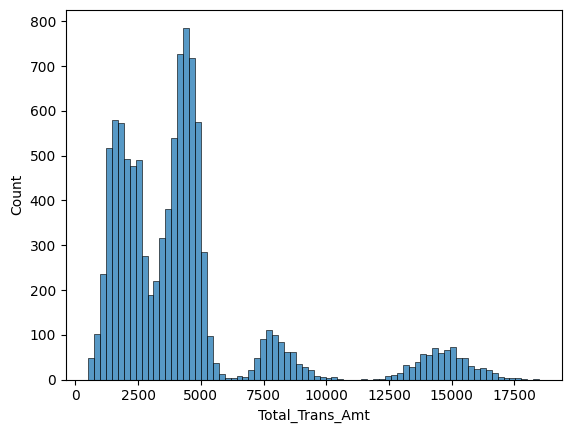

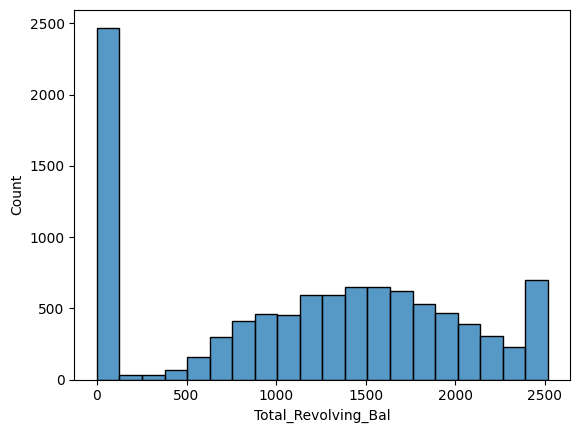

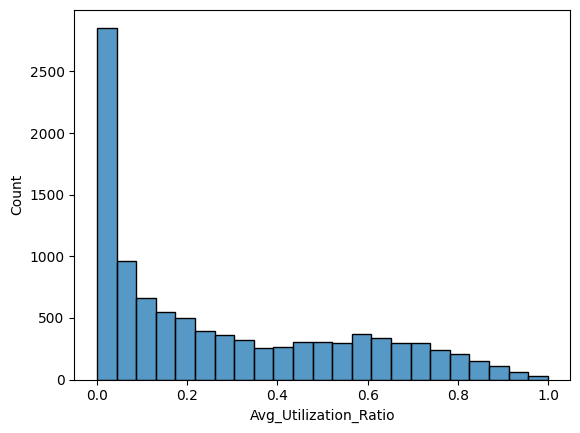

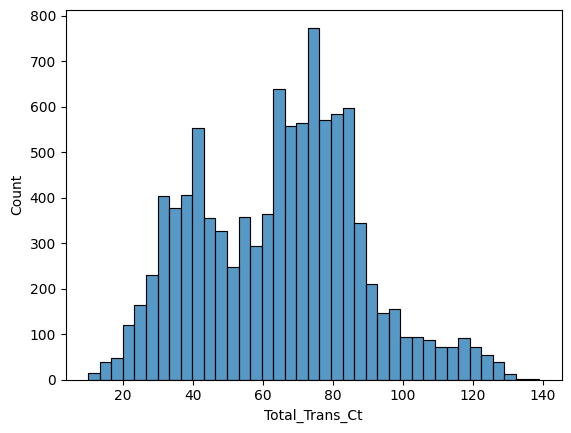

In [25]:
numeric_columns = ['Customer_Age', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Revolving_Bal','Avg_Utilization_Ratio',  'Total_Trans_Ct']

def distribution(df,list):
    sns.histplot(df[list])
    plt.show()

for i in numeric_columns:
    #plt.grid(True)
    distribution(df,i)
    plt.show()

# **Data Preprocessing**

In [28]:
# Encoding categorical data to numerical value.

categorical_features = [
    'Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
    'Income_Category', 'Card_Category'
]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical feature
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Now, the categorical features are label encoded in the DataFrame

### **Q4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

- OLS Regression
- HeatMap
- Random Forest Classifier
- Univariate Feature Selection

In [155]:
#OLS Regression method.
var = sm.OLS(df['Attrition_Flag'], df[['Customer_Age', 'Dependent_count', 'Months_on_book',
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]).fit()

var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Attrition_Flag   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              6835.
Date:                Tue, 30 Jan 2024   Prob (F-statistic):                        0.00
Time:                        04:45:46   Log-Likelihood:                         -1933.5
No. Observations:               10127   AIC:                                      3893.
Df Residuals:                   10114   BIC:                                      3987.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Customer_Age                 0.0004      0.001      0.739      0.460      -0.001       0.001
Dependent_count             -0.0114      0.002     -5.231      0.000      -0.016      -0.007
Months_on_book               0.0004      0.001      0.659      0.510      -0.001       0.002
Total_Relationship_Count     0.0437      0.002     22.610      0.000       0.040       0.048
Months_Inactive_12_mon      -0.0416      0.003    -14.783      0.000      -0.047      -0.036
Contacts_Count_12_mon       -0.0408      0.003    -16.032      0.000      -0.046      -0.036
Credit_Limit              3.362e-05   1.66e-06     20.295      0.000    3.04e-05    3.69e-05
Total_Revolving_Bal       6.573e-05   3.49e-06     18.847      0.000    5.89e-05    7.26e-05
Avg_Open_To_Buy           -3.21e-05   1.85e-06    -17.346      0.000   -3.57e-05   -2.85e-05
Total_Amt_Chng_Q4_Q1         0.0663      0.014      4.825      0.000       0.039       0.093
Total_Trans_Amt          -3.493e-05   1.54e-06    -22.700      0.000   -3.79e-05   -3.19e-05
Total_Trans_Ct               0.0097      0.000     47.819      0.000       0.009       0.010
Total_Ct_Chng_Q4_Q1          0.2973      0.013     22.311      0.000       0.271       0.323
Avg_Utilization_Ratio       -0.0055      0.018     -0.306      0.760      -0.041       0.030
==============================================================================
Omnibus:                     1230.913   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1755.028
Skew:                          -0.936   Prob(JB):                         0.00
Kurtosis:                       3.811   Cond. No.                     7.13e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 6.13e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

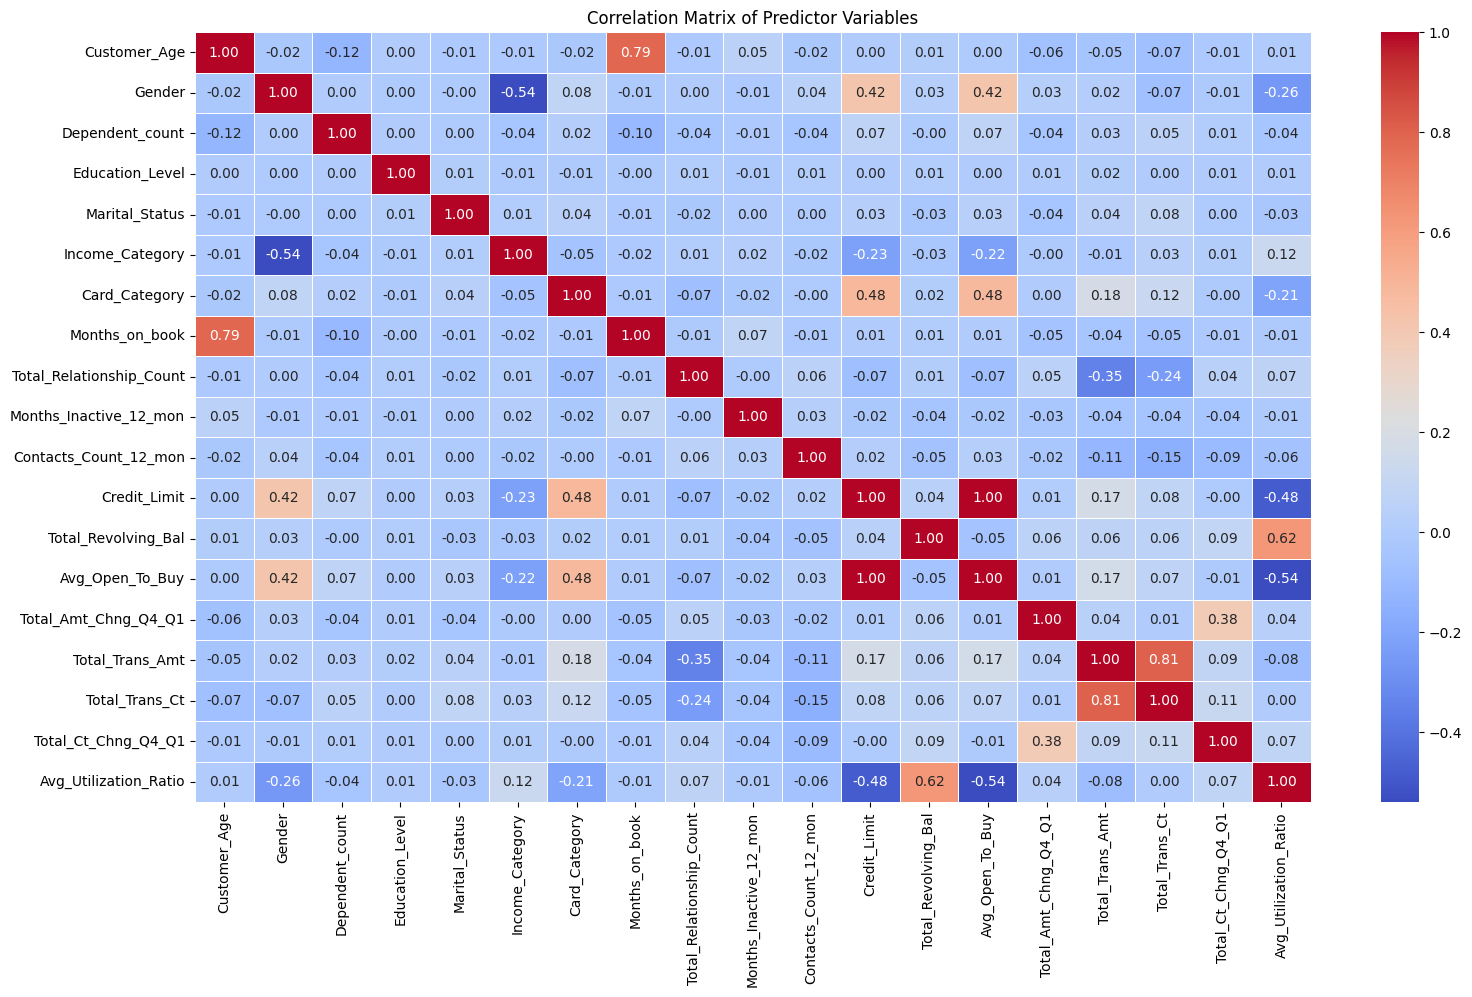

In [30]:
# 1. Calculate correlations between numeric variables and the target variable
predictor_variables = df.drop(columns=['Attrition_Flag'])  # Exclude the target variable

# Calculate the correlation matrix
correlation_matrix = predictor_variables.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Predictor Variables')
plt.show()

### **Q7. In the predictor variables independent of all the other predictor variables?**
Ans 7. -
Theory → In the context of your assignment question, "Are the predictor variables independent of all the other predictor variables?", you are being asked whether the predictor variables (features used to predict the target variable) are correlated with each other or not.

"Months_on_book" and "Customer_Age" have a high positive correlation of 0.79, suggesting a strong relationship between these two variables. This means they are not independent.
"Credit_Limit" and "Avg_Open_To_Buy" also show a very high positive correlation of 0.99, which implies almost perfect positive linear relationship, and thus, they are not independent.
"Total_Trans_Amt" and "Total_Trans_Ct" have a high positive correlation of 0.81, indicating a significant relationship and dependence between these two variables.


Index(['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Total_Revolving_Bal', 'Total_Relationship_Count'],
      dtype='object')


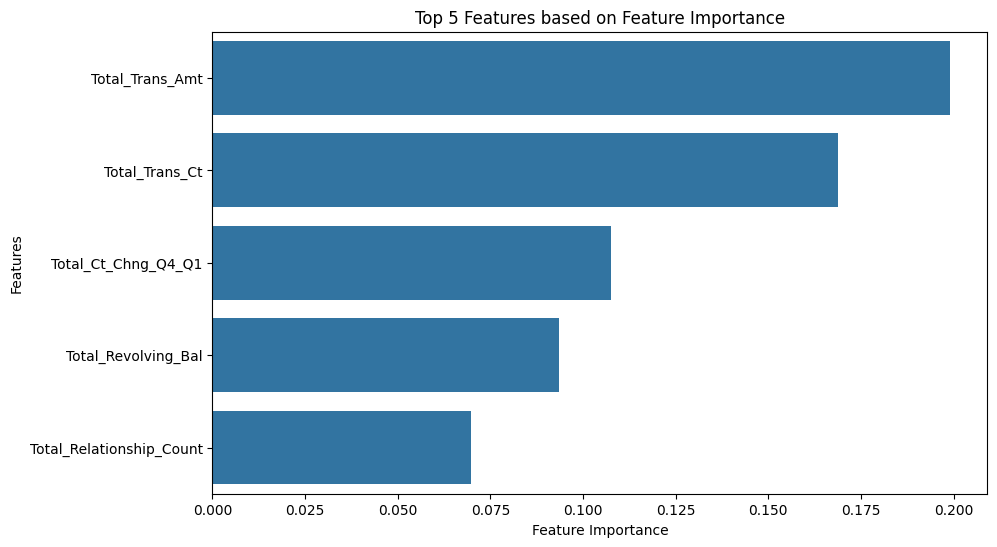

In [154]:
# Separate features
X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Select the top N important features
n_selected_features = 5  # You can adjust this value
selected_features_indices = feature_importances.argsort()[-n_selected_features:][::-1]
selected_features = X.columns[selected_features_indices]

# Print selected features
print(selected_features)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[selected_features_indices], y=selected_features, orient="h")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title(f"Top {n_selected_features} Features based on Feature Importance")
plt.show()


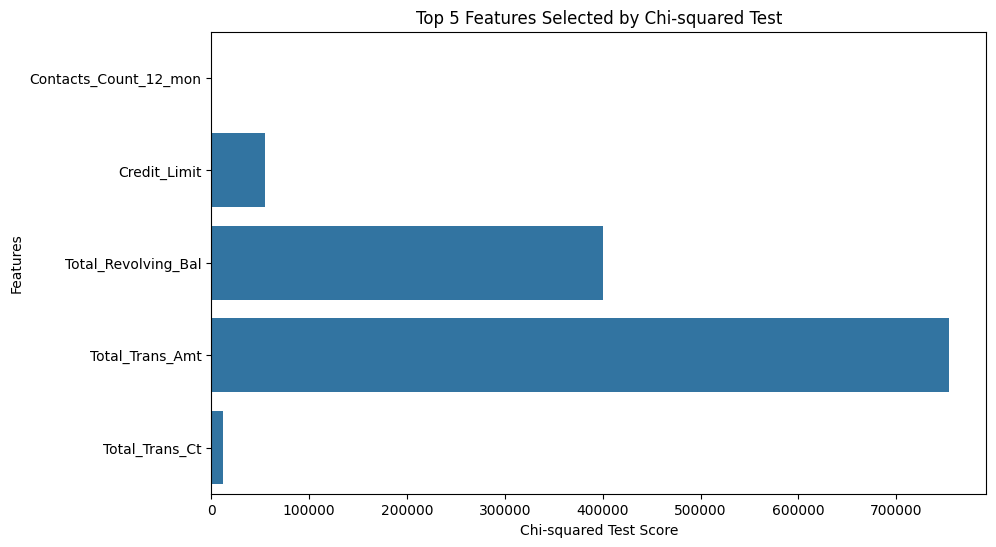

In [153]:
X = df.drop(columns=['Attrition_Flag'])  # Features
y = df['Attrition_Flag']  # Target variable

# Initialize SelectKBest with chi-squared scoring
n_selected_features = 5
selector = SelectKBest(score_func=chi2, k=n_selected_features)

# Fit the selector to the data and get selected features
selector.fit(X, y)
selected_features_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_features_indices]

# Univariate analysis
# Get the chi-squared test scores
chi2_scores = selector.scores_

# Create a bar plot for chi-squared scores
plt.figure(figsize=(10, 6))
sns.barplot(x=chi2_scores[selected_features_indices], y=selected_features, orient="h")
plt.xlabel("Chi-squared Test Score")
plt.ylabel("Features")
plt.title(f"Top {n_selected_features} Features Selected by Chi-squared Test")
plt.show()

### **Q8. Which predictor variables are the most important?**
Ans 8. - List of predictor variables that are most important according to various feature selection models are as follows -
Total_Revolving_Bal,
Total_Trans_Amt
Total_Ct_Chng_Q4_Q1
Total_Trans_Ct
Total_Revolving_Bal
Avg_Utilization_Ratio
Total_Relationship_Count
Credit_Limit
Contacts_Count_12_mon

A total of 9 predictors are most important to determine the dependent variables.


In [35]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset
numeric_columns = ['Customer_Age', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Revolving_Bal','Avg_Utilization_Ratio',  'Total_Trans_Ct']

# Calculate summary statistics for numeric predictor variables
summary = df[numeric_columns].describe()

# Display the summary statistics
print(summary)


       Customer_Age  Credit_Limit  Avg_Open_To_Buy  Total_Trans_Amt  \
count  10127.000000  10127.000000     10127.000000     10127.000000   
mean      46.325960   8631.953698      7469.139637      4404.086304   
std        8.016814   9088.776650      9090.685324      3397.129254   
min       26.000000   1438.300000         3.000000       510.000000   
25%       41.000000   2555.000000      1324.500000      2155.500000   
50%       46.000000   4549.000000      3474.000000      3899.000000   
75%       52.000000  11067.500000      9859.000000      4741.000000   
max       73.000000  34516.000000     34516.000000     18484.000000   

       Total_Revolving_Bal  Avg_Utilization_Ratio  Total_Trans_Ct  
count         10127.000000           10127.000000    10127.000000  
mean           1162.814061               0.274894       64.858695  
std             814.987335               0.275691       23.472570  
min               0.000000               0.000000       10.000000  
25%             359.

### **Q5. Which independent variables have missing data? How much?**
Ans 5. As we can see their is no missing values in any columns of the dataset.

In [43]:
df.isnull().sum()


Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# **Split Dataset into Train & Test datasets -**

### **Q6. Do the training and test sets have the same data?**

In [76]:
from sklearn.model_selection import train_test_split

#Train & Test dataset split
X = df.drop(columns=['Attrition_Flag'])  # Features
y = df['Attrition_Flag']  # Target variable

# Split the dataset into equal parts (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [45]:
# Check if the data in X_train and X_test are identical
data_equal = X_train.equals(X_test)

if data_equal:
    print("The training and test sets have identical data.")
else:
    print("The training and test sets have different data.")


The training and test sets have different data.


# **Model Training -**

### **Logistic Regression -Accuracy of model = 88.31%**

Accuracy of Logistic Regression: 0.8841724251398486

 Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.46      0.57       496
           1       0.90      0.97      0.93      2543

    accuracy                           0.88      3039
   macro avg       0.82      0.71      0.75      3039
weighted avg       0.87      0.88      0.87      3039



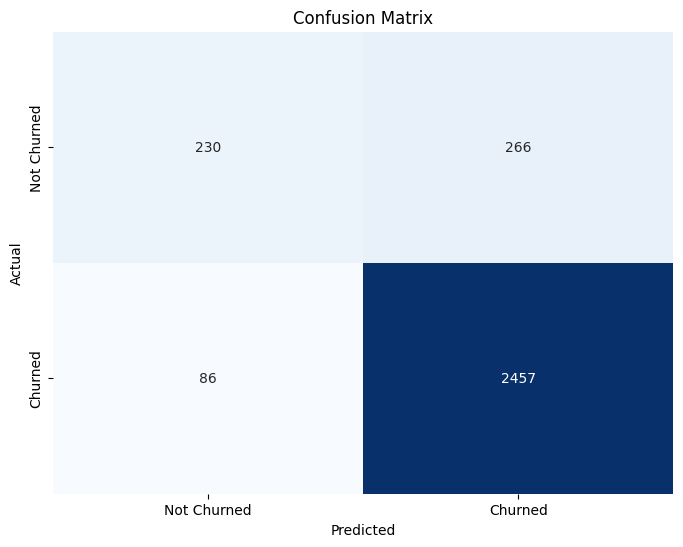

In [143]:
X_train, X_test, y_train, y_test  # Make sure you have already split the data

# Initialize the Logistic Regression model
logistic_classifier = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logistic_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_classifier.predict(X_test)

# Calculate accuracy & classification
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy of Logistic Regression: {accuracy}")
print("\n Classification Report:\n", classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Churned", "Churned"], yticklabels=["Not Churned", "Churned"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### **SVM-  Accuracy of model = 83.67%**

In [78]:
# Initialize SVM classifier
svm_classifier = SVC()

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy & classification report
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy of SVM:", accuracy_svm)
print("\n Classification Report:\n", classification_rep)

Accuracy of SVM: 0.836788417242514

 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.47      0.57       496
           1       0.90      0.96      0.93      2543

    accuracy                           0.88      3039
   macro avg       0.81      0.72      0.75      3039
weighted avg       0.87      0.88      0.87      3039



### **Decision Tree Model -  Accuracy of model = 93.35%**

In [56]:
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy & classification report
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy of Decision Tree:", accuracy_dt)
print("\n Classification Report:\n", classification_rep)


Accuracy of Decision Tree: 0.9335307666995722

 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87       496
           1       0.97      0.99      0.98      2543

    accuracy                           0.96      3039
   macro avg       0.95      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039



# **Outlier Detection -**

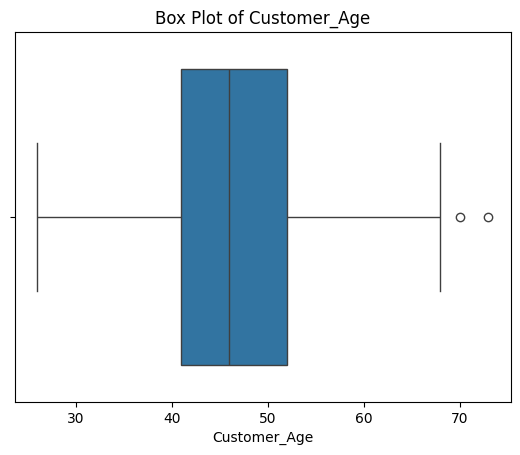

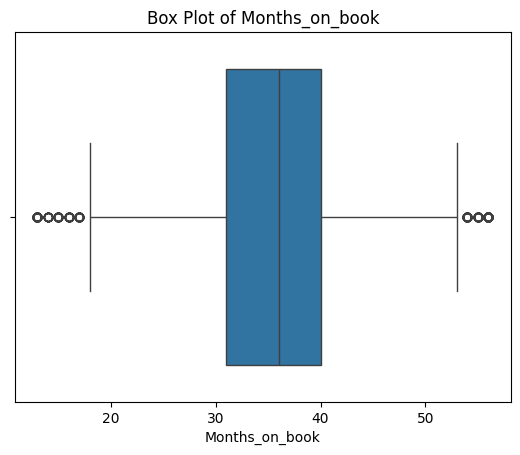

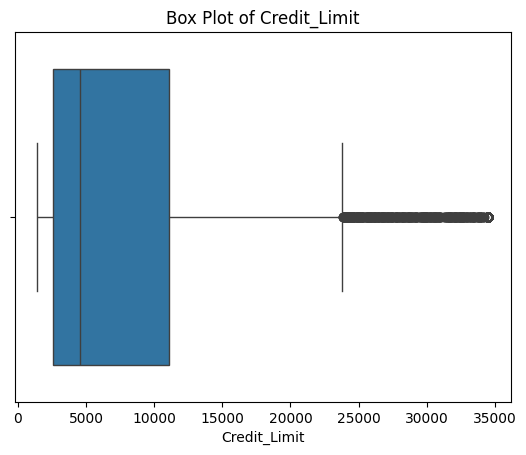

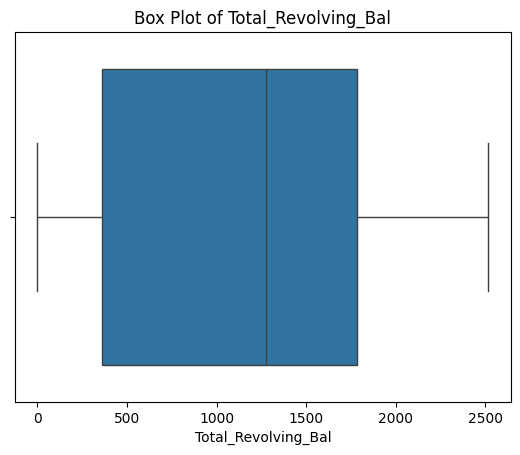

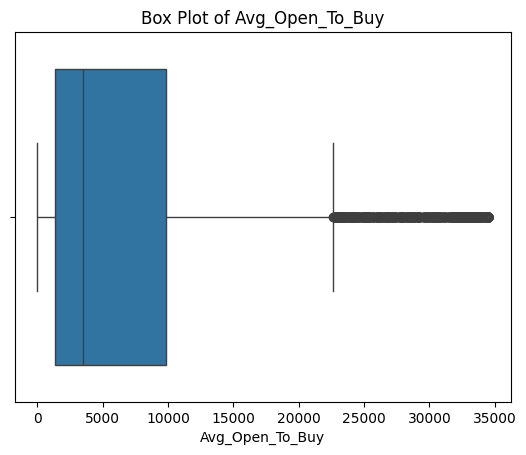

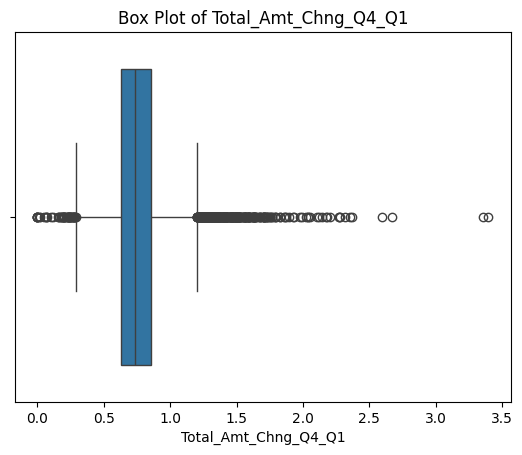

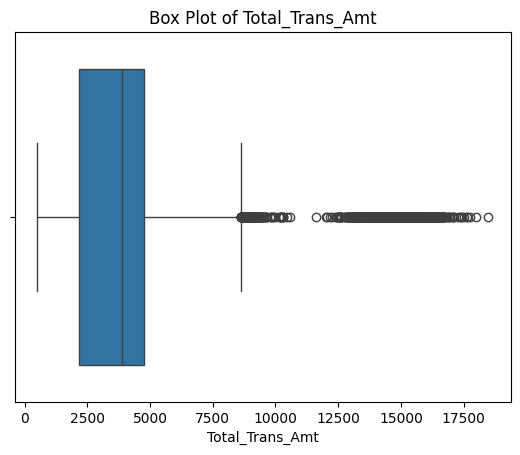

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for numeric variables (excluding 'Attrition_Flag')
numeric_columns = ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt']

for column in numeric_columns:
    sns.boxplot(x=df[column])
    plt.xlabel(column)
    plt.title(f'Box Plot of {column}')
    plt.show()


### ***Q9. Do the ranges of the predictor variables make sense?**
Ans 9.

Customer_Age: Ranges from 26 to 73 years with a mean age of approximately 46 years. This range makes sense for a credit card customer base.

Dependent_count: Ranges from 0 to 5, which is reasonable for the number of dependents a person might have.

Months_on_book: Ranges from 13 to 56 months. This represents the length of the relationship with the bank and is a plausible range.

Total_Relationship_Count: Ranges from 1 to 6. This could represent the number of products a customer has with the bank, and the range is logical.

Months_Inactive_12_mon: Ranges from 0 to 6 months, indicating the number of months a customer was inactive in the last 12 months. This range is also reasonable.

Contacts_Count_12_mon: Ranges from 0 to 6, which could represent the number of contacts or interactions with the bank. The range seems plausible.

Credit_Limit: Ranges from $1,438.30 to $34,516, which fits within the typical range of credit limits for personal credit cards.

Total_Revolving_Bal: Ranges from $0 to $2,517. This is the balance that carries over from one month to the next, and the range appears reasonable for credit card users.

Avg_Open_To_Buy: Ranges from $3 to $34,516. This represents the unused line of credit, and the range is consistent with the credit limit range.

Total_Amt_Chng_Q4_Q1: Ranges from 0 to 3.397. This might represent a ratio or change amount and should be investigated to ensure it aligns with expectations.

Total_Trans_Amt: Ranges from $510 to $18,484, which indicates the total amount spent on transactions. This range is typical for credit card expenditure over a period of time.

Total_Trans_Ct: Ranges from 10 to 139, representing the count of transactions. This range is typical for credit card usage.

Total_Ct_Chng_Q4_Q1: Ranges from 0 to 3.714, which could be a ratio indicating the change in transaction count. The range seems reasonable but should be contextualized within the specific meaning in the dataset.

Avg_Utilization_Ratio: Ranges from 0 to 0.999, likely representing the proportion of the credit line used. A ratio from 0 to just under 1 is expected.

The last two variables appear to be Naive Bayes Classifier probabilities for the "Attrition_Flag" and are not predictor variables but rather outputs of a model.


# **Model Training - (Removing Outliers)**

1.   Accuracy of Logistic Regression: 89.9086
2.   Accuracy of Decision Tree: 93.388
1.   Accuracy of Random Forest: 96.215

In [58]:
# Specify columns with outliers
columns_with_outliers = [ 'Credit_Limit',  'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1']

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the DataFrame
df_cleaned = remove_outliers_iqr(df, columns_with_outliers)

In [59]:
# Check the number of rows removed
rows_removed = len(df) - len(df_cleaned)
print(f"Number of rows removed due to outliers: {rows_removed}")

Number of rows removed due to outliers: 2466


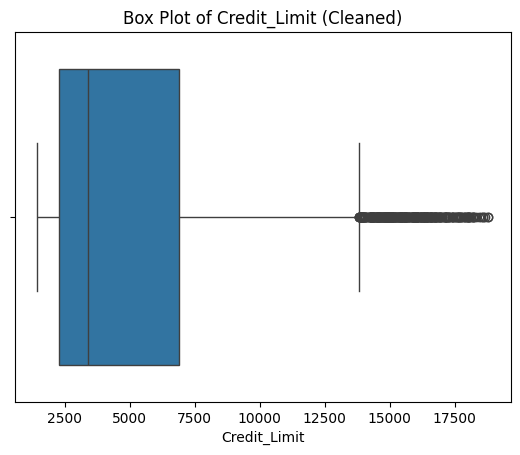

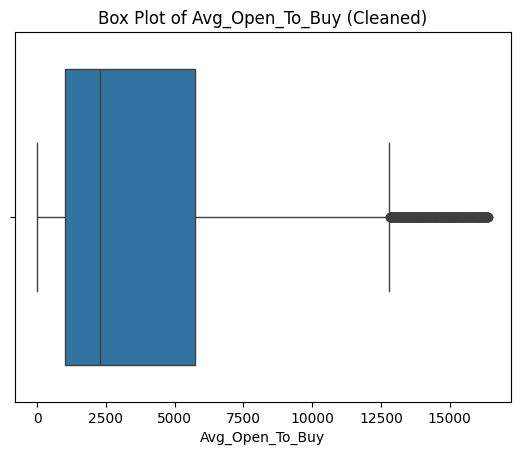

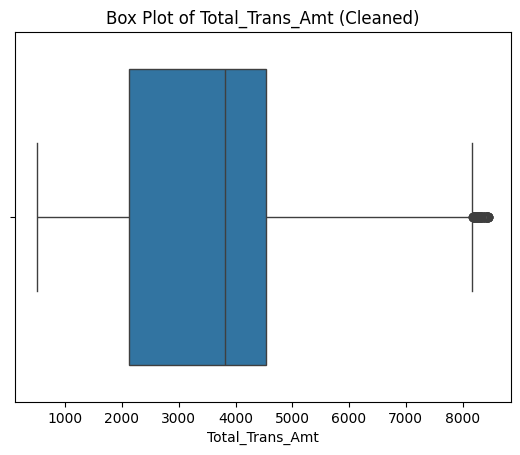

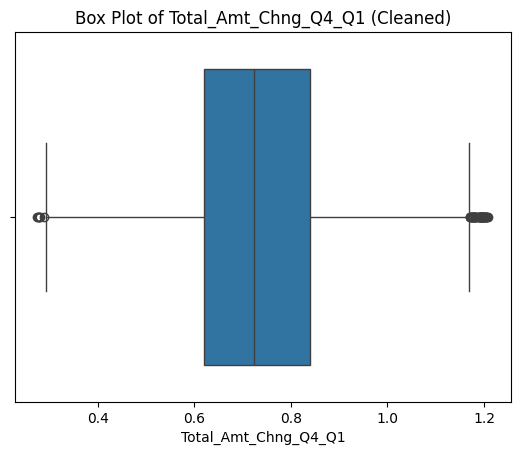

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for cleaned data
for column in columns_with_outliers:
    sns.boxplot(x=df_cleaned[column])
    plt.xlabel(column)
    plt.title(f'Box Plot of {column} (Cleaned)')
    plt.show()

In [68]:
X = df_cleaned.drop(columns=['Attrition_Flag'])  # Features
y = df_cleaned['Attrition_Flag']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
# Create a Logistic Regression model with a higher max_iter value
logistic_regression_model = LogisticRegression(max_iter=2000)  # You can adjust the value as needed

# Fit the model to the training data
logistic_regression_model.fit(X_train, y_train)

# Evaluate the model on the test data and print the accuracy
accuracy = logistic_regression_model.score(X_test, y_test)
print("Accuracy of Logistic Regression:", accuracy)

Accuracy of Logistic Regression: 0.8990865593736407


In [70]:
# Initialize and train a Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Predict using the trained model
y_pred_random_forest = random_forest_model.predict(X_test)

# Calculate accuracy
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Accuracy of Random Forest:", accuracy_random_forest)


Accuracy of Random Forest: 0.9630274032187908


In [71]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)  # You can choose a different kernel and adjust C as needed

# Fit the SVM model to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM:", accuracy)


Accuracy of Decision Tree: 0.9325793823401479


# **Removing data and applying imputation.**


In [79]:
import numpy as np

# Sample dataset
data_info = df.copy()

# Calculate the mean
mean = np.mean(data_info['Customer_Age'])

# Calculate the median
median = np.median(data_info['Customer_Age'])

# Calculate the mode
from scipy import stats
mode = stats.mode(data_info['Customer_Age'])

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode.mode)


Mean: 46.32596030413745
Median: 46.0
Mode: 44


# **1% - Mean Method -**

In [80]:
data_1_mean = df.copy()

# Removing 1% data from the 'Customer_Age' column
data_percent_mean1 = data_1_mean['Customer_Age'].sample(frac=0.01)

# Using the index of the sampled data to set them to NaN
data_1_mean.loc[data_percent_mean1.index, 'Customer_Age'] = np.NaN

In [81]:
data_1_mean['Customer_Age'].isnull().sum()

101

In [82]:
data_1_mean['Customer_Age'] = data_1_mean['Customer_Age'].fillna(data_1_mean['Customer_Age'].mean())

In [83]:
data_1_mean['Customer_Age'].isnull().sum()

0

In [85]:
#Train & Test dataset split
X = data_1_mean.drop(columns=['Attrition_Flag'])  # Features
y = data_1_mean['Attrition_Flag']  # Target variable

# Split the dataset into equal parts (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [86]:
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Accuracy of Decision Tree:", accuracy_dt)
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("\n Classification Report:\n", classification_rep)


Accuracy of Decision Tree: 0.9285949325435998

 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.47      0.57       496
           1       0.90      0.96      0.93      2543

    accuracy                           0.88      3039
   macro avg       0.81      0.72      0.75      3039
weighted avg       0.87      0.88      0.87      3039



# **5% - Mean Method -**

In [88]:
data_5_mean = df.copy()

# Removing 5% data from the 'Customer_Age' column
data_percent_mean5 = data_5_mean['Customer_Age'].sample(frac=0.05)

# Using the index of the sampled data to set them to NaN
data_5_mean.loc[data_percent_mean5.index, 'Customer_Age'] = np.NaN

In [89]:
data_5_mean['Customer_Age'].isnull().sum()

506

In [90]:
data_5_mean['Customer_Age']=data_5_mean['Customer_Age'].fillna(data_5_mean['Customer_Age'].mean())

In [91]:
data_5_mean['Customer_Age'].isnull().sum()

0

In [92]:
#Train & Test dataset split
X = data_5_mean.drop(columns=['Attrition_Flag'])  # Features
y = data_5_mean['Attrition_Flag']  # Target variable

# Split the dataset into equal parts (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [93]:
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Accuracy of Decision Tree:", accuracy_dt)
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("\n Classification Report:\n", classification_rep)


Accuracy of Decision Tree: 0.924646265218822

 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.47      0.57       496
           1       0.90      0.96      0.93      2543

    accuracy                           0.88      3039
   macro avg       0.81      0.72      0.75      3039
weighted avg       0.87      0.88      0.87      3039



# **10% Mean Method -**

In [94]:
data_10_mean = df.copy()

# Removing 10% data from the 'Customer_Age' column
data_percent_mean10 = data_10_mean['Customer_Age'].sample(frac=0.10)

# Using the index of the sampled data to set them to NaN
data_10_mean.loc[data_percent_mean10.index, 'Customer_Age'] = np.NaN

In [95]:
data_10_mean['Customer_Age'].isnull().sum()

1013

In [96]:
data_10_mean['Customer_Age']=data_10_mean['Customer_Age'].fillna(data_10_mean['Customer_Age'].mean())

In [97]:
data_10_mean['Customer_Age'].isnull().sum()

0

In [100]:
#Train & Test dataset split
X = data_10_mean.drop(columns=['Attrition_Flag'])  # Features
y = data_10_mean['Attrition_Flag']  # Target variable

# Split the dataset into equal parts (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [101]:
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Accuracy of Decision Tree:", accuracy_dt)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("\n Classification Report:\n", classification_rep)


Accuracy of Decision Tree: 0.9285949325435998

 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.47      0.57       496
           1       0.90      0.96      0.93      2543

    accuracy                           0.88      3039
   macro avg       0.81      0.72      0.75      3039
weighted avg       0.87      0.88      0.87      3039



# **1% Median Part -**

In [102]:
data_1_median = df.copy()

# Removing 10% data from the 'Customer_Age' column
data_percent_median1 = data_1_median['Customer_Age'].sample(frac=0.01)

# Using the index of the sampled data to set them to NaN
data_1_median.loc[data_percent_median1.index, 'Customer_Age'] = np.NaN

In [103]:
data_1_median['Customer_Age'].isnull().sum()

101

In [104]:
data_1_median['Customer_Age']=data_1_median['Customer_Age'].fillna(data_1_median['Customer_Age'].median())

In [105]:
data_1_median['Customer_Age'].isnull().sum()

0

In [106]:
#Train & Test dataset split
X = data_1_median.drop(columns=['Attrition_Flag'])  # Features
y = data_1_median['Attrition_Flag']  # Target variable

# Split the dataset into equal parts (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree:", accuracy_dt)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("\n Classification Report:\n", classification_rep)


Accuracy of Decision Tree: 0.9305692662059888

 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.47      0.57       496
           1       0.90      0.96      0.93      2543

    accuracy                           0.88      3039
   macro avg       0.81      0.72      0.75      3039
weighted avg       0.87      0.88      0.87      3039



# **5% Median Part -**

In [109]:
data_5_median = df.copy()

# Removing 10% data from the 'Customer_Age' column
data_percent_median5 = data_5_median['Customer_Age'].sample(frac=0.05)

# Using the index of the sampled data to set them to NaN
data_5_median.loc[data_percent_median5.index, 'Customer_Age'] = np.NaN

In [110]:
data_5_median['Customer_Age'].isnull().sum()

506

In [111]:
data_5_median['Customer_Age']=data_5_median['Customer_Age'].fillna(data_5_median['Customer_Age'].median())

In [112]:
data_5_median['Customer_Age'].isnull().sum()

0

In [113]:
#Train & Test dataset split
X = data_5_median.drop(columns=['Attrition_Flag'])  # Features
y = data_5_median['Attrition_Flag']  # Target variable

# Split the dataset into equal parts (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [114]:
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Accuracy of Decision Tree:", accuracy_dt)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("\n Classification Report:\n", classification_rep)


Accuracy of Decision Tree: 0.9315564330371833

 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.47      0.57       496
           1       0.90      0.96      0.93      2543

    accuracy                           0.88      3039
   macro avg       0.81      0.72      0.75      3039
weighted avg       0.87      0.88      0.87      3039



# **10% Median Part -**

In [115]:
data_10_median = df.copy()

# Removing 10% data from the 'Customer_Age' column
data_percent_median10 = data_10_median['Customer_Age'].sample(frac=0.10)

# Using the index of the sampled data to set them to NaN
data_10_median.loc[data_percent_median10.index, 'Customer_Age'] = np.NaN

In [116]:
data_10_median['Customer_Age'].isnull().sum()

1013

In [117]:
data_10_median['Customer_Age']=data_10_median['Customer_Age'].fillna(data_10_median['Customer_Age'].median())

In [118]:
data_10_median['Customer_Age'].isnull().sum()

0

In [119]:
#Train & Test dataset split
X = data_10_median.drop(columns=['Attrition_Flag'])  # Features
y = data_10_median['Attrition_Flag']  # Target variable

# Split the dataset into equal parts (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [120]:
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Accuracy of Decision Tree:", accuracy_dt)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("\n Classification Report:\n", classification_rep)


Accuracy of Decision Tree: 0.9282658769332017

 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.47      0.57       496
           1       0.90      0.96      0.93      2543

    accuracy                           0.88      3039
   macro avg       0.81      0.72      0.75      3039
weighted avg       0.87      0.88      0.87      3039



# **1% Mode Part -**

In [121]:
data_1_mode = df.copy()

# Removing 10% data from the 'Customer_Age' column
data_percent_mode1 = data_1_mode['Customer_Age'].sample(frac=0.01)

# Using the index of the sampled data to set them to NaN
data_1_mode.loc[data_percent_mode1.index, 'Customer_Age'] = np.NaN

In [122]:
data_1_mode['Customer_Age'].isnull().sum()

101

In [123]:
data_1_mode['Customer_Age'] = data_1_mode['Customer_Age'].fillna(data_1_mode['Customer_Age'].mode()[0])

In [124]:
data_1_mode['Customer_Age'].isnull().sum()

0

In [125]:
#Train & Test dataset split
X = data_1_mode.drop(columns=['Attrition_Flag'])  # Features
y = data_1_mode['Attrition_Flag']  # Target variable

# Split the dataset into equal parts (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [126]:
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Accuracy of Decision Tree:", accuracy_dt)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("\n Classification Report:\n", classification_rep)


Accuracy of Decision Tree: 0.9302402105955907

 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.47      0.57       496
           1       0.90      0.96      0.93      2543

    accuracy                           0.88      3039
   macro avg       0.81      0.72      0.75      3039
weighted avg       0.87      0.88      0.87      3039



# **5% Mode Part -**

In [127]:
data_5_mode = df.copy()

# Removing 10% data from the 'Customer_Age' column
data_percent_mode5 = data_5_mode['Customer_Age'].sample(frac=0.05)

# Using the index of the sampled data to set them to NaN
data_5_mode.loc[data_percent_mode5.index, 'Customer_Age'] = np.NaN

In [128]:
data_5_mode['Customer_Age'].isnull().sum()

506

In [129]:
data_5_mode['Customer_Age'] = data_5_mode['Customer_Age'].fillna(data_5_mode['Customer_Age'].mode()[0])

In [130]:
data_5_mode['Customer_Age'].isnull().sum()

0

In [131]:
#Train & Test dataset split
X = data_5_mode.drop(columns=['Attrition_Flag'])  # Features
y = data_5_mode['Attrition_Flag']  # Target variable

# Split the dataset into equal parts (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [132]:
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Accuracy of Decision Tree:", accuracy_dt)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("\n Classification Report:\n", classification_rep)


Accuracy of Decision Tree: 0.926949654491609

 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.47      0.57       496
           1       0.90      0.96      0.93      2543

    accuracy                           0.88      3039
   macro avg       0.81      0.72      0.75      3039
weighted avg       0.87      0.88      0.87      3039



# **10% Mode Part -**

In [133]:
data_10_mode = df.copy()

# Removing 10% data from the 'Customer_Age' column
data_percent_mode10 = data_10_mode['Customer_Age'].sample(frac=0.10)

# Using the index of the sampled data to set them to NaN
data_10_mode.loc[data_percent_mode10.index, 'Customer_Age'] = np.NaN

In [134]:
data_10_mode['Customer_Age'].isnull().sum()

1013

In [135]:
data_10_mode['Customer_Age'] = data_10_mode['Customer_Age'].fillna(data_10_mode['Customer_Age'].mode()[0])

In [136]:
data_10_mode['Customer_Age'].isnull().sum()

0

In [137]:
#Train & Test dataset split
X = data_10_mode.drop(columns=['Attrition_Flag'])  # Features
y = data_10_mode['Attrition_Flag']  # Target variable

# Split the dataset into equal parts (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [138]:
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Accuracy of Decision Tree:", accuracy_dt)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("\n Classification Report:\n", classification_rep)


Accuracy of Decision Tree: 0.9302402105955907

 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.47      0.57       496
           1       0.90      0.96      0.93      2543

    accuracy                           0.88      3039
   macro avg       0.81      0.72      0.75      3039
weighted avg       0.87      0.88      0.87      3039



In [151]:
mean_original = y_test.mean()
mean_predicted_original = y_pred_dt.mean()
bias_original = abs(mean_original - mean_predicted_original)

mean_imputed = y_test.mean()
mean_predicted_imputed = y_pred_dt.mean()
bias_imputed = abs(mean_imputed - mean_predicted_imputed)
print('Bias imputed:',bias_imputed)


Bias imputed: 0.003948667324777944


In [152]:
variance_original = ((y_pred_dt - mean_predicted_original) ** 2).mean()
variance_imputed = ((y_pred_dt - mean_predicted_imputed) ** 2).mean()

print('Variance Imputed:', variance_imputed)

Variance Imputed: 0.1338982392005822


## **REFERENCES**



1.   Sckit learn offcial documentation
2.   Refered Towards Data Science
3.   Correlation Matrix and Heatmap
4.   Random forest regression

- **Correlation Matrix and Heatmap:**
The correlation matrix and heatmap were created using the Seaborn library in Python, as outlined in the Seaborn documentation: https://seaborn.pydata.org/
Interpretation of the correlation matrices and heatmap followed the guidance from relevant tutorials and guides used in this analysis.

- **Random Forest Regression:**
Random forest regression was implemented in this analysis using Scikit-Learn in Python, and reference was made to the Scikit-Learn documentation: https://scikit-learn.org/stable/documentation.html
The analysis benefited from academic sources such as "Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32," which provided insights into the random forest algorithm.

# **LICENSE**

MIT License

Copyright (c) 2024 ckulkarni13

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.